##  Importing the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model

from glob import glob
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import load_model

from skimage import io
from PIL import Image
from skimage import transform

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#path of train and validation dataset
train_path = '/content/drive/MyDrive/data/train'
val_path = '/content/drive/MyDrive/data/val'

In [4]:
#printing the all the folders(directory structure) in the train dataset
folders = glob('/content/drive/MyDrive/data/train/*')
folders

['/content/drive/MyDrive/data/train/diseased cotton leaf',
 '/content/drive/MyDrive/data/train/fresh cotton leaf',
 '/content/drive/MyDrive/data/train/diseased cotton plant',
 '/content/drive/MyDrive/data/train/fresh cotton plant']

## Creating image data generator

In [5]:
#train data generator
#data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

#test data generator
test_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
print("------TRAIN DATA-------") 
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',shuffle=False)

------TRAIN DATA-------
Found 1951 images belonging to 4 classes.


In [7]:
print("------ VALIDATION DATA-------")
val_set = test_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',shuffle=False)

------ VALIDATION DATA-------
Found 324 images belonging to 4 classes.


In [8]:
training_set.class_indices 

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

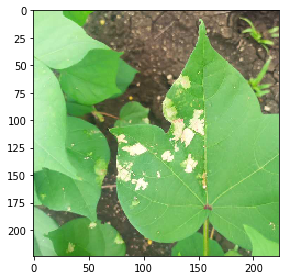

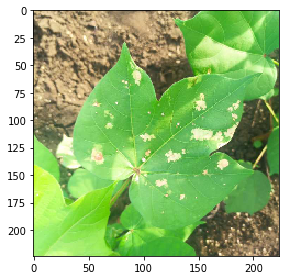

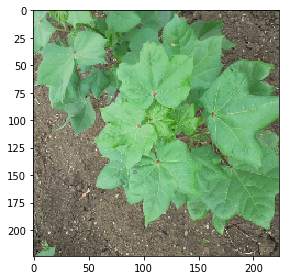

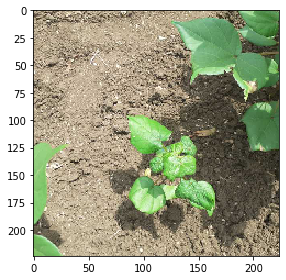

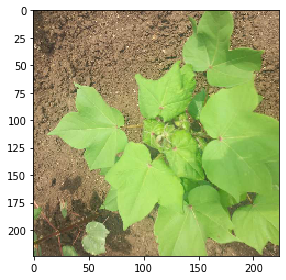

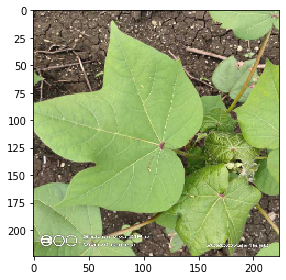

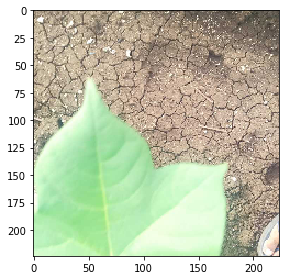

In [ ]:
# printing random set of images from directory
def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()
for i in range(0,7):
    x,y = val_set.next()
    image = x[i]
    imshow(image)

## Transfer learning - ResNet50

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
# loading the pretrained resnet50 with top equal to false
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
# Adding the custom top layer on ResNet50
x = Flatten()(resnet.output)
prediction = Dense(len(folders), activation='softmax')(x)
model_resnet50 = Model(inputs=resnet.input, outputs=prediction)# model object

In [ ]:
model_resnet50.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
# compiling the ResNet50
model_resnet50.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# fiting the model
# Run the cell. It will take some time to execute
r = model_resnet50.fit_generator(
  training_set,
  validation_data=val_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 456s 7s/step - loss: 11.9356 - accuracy: 0.2550 - val_loss: 8.2680 - val_accuracy: 0.4784
Epoch 2/20
61/61 [==============================] - 36s 595ms/step - loss: 6.4370 - accuracy: 0.2816 - val_loss: 6.0880 - val_accuracy: 0.3580
Epoch 3/20
61/61 [==============================] - 37s 599ms/step - loss: 5.4444 - accuracy: 0.2857 - val_loss: 5.3568 - val_accuracy: 0.4290
Epoch 4/20
61/61 [==============================] - 36s 595ms/step - loss: 5.3135 - accuracy: 0.2525 - val_loss: 2.1056 - val_accuracy: 0.5772
Epoch 5/20
61/61 [==============================] - 36s 594ms/step - loss: 4.0334 - accuracy: 0.3984 - val_loss: 1.9644 - val_accuracy: 0.3549
Epoch 6/20
61/61 [==============================] - 36s 597ms/step - loss: 2.7804 - accuracy: 0.3744 - val_loss: 1.1046 - val_accuracy: 0.6080
Epoch 7/20
61/61 [==============================] - 36s 590ms/step - loss: 2.6545 - accuracy: 0.5101 - val_loss: 2.6702 - val_accuracy: 0.5895


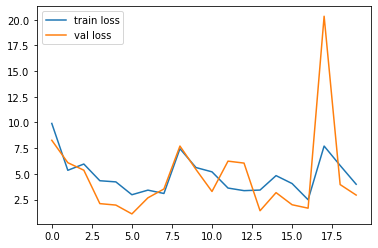

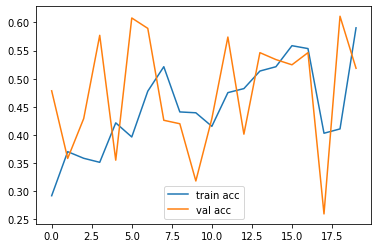

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

## Transfer learning - ResNet152V2

In [ ]:
# loading the pretrained resnet152V2 with top equal to false
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

234553344/234545216 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights 
    layer.trainable = False

In [ ]:
# Adding the custom top layer on ResNet152V2
x = Flatten()(resnet152V2.output)
prediction = Dense(len(folders), activation='softmax')(x)
model_renet152v2 = Model(inputs=resnet152V2.input, outputs=prediction)

In [ ]:
#model summary
model_resnet152v2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
# compiling renet152v2
model_resnet152v2.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# fiting the model
# Run the cell. It will take some time to execute
r = model_resnet152v2.fit_generator(
  training_set,
  validation_data=val_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 49s 686ms/step - loss: 10.6988 - accuracy: 0.4818 - val_loss: 1.2043 - val_accuracy: 0.8580
Epoch 2/20
61/61 [==============================] - 39s 643ms/step - loss: 1.1390 - accuracy: 0.8485 - val_loss: 1.2752 - val_accuracy: 0.8611
Epoch 3/20
61/61 [==============================] - 39s 643ms/step - loss: 1.0535 - accuracy: 0.9016 - val_loss: 1.0270 - val_accuracy: 0.8889
Epoch 4/20
61/61 [==============================] - 39s 644ms/step - loss: 0.2815 - accuracy: 0.9597 - val_loss: 1.0109 - val_accuracy: 0.8920
Epoch 5/20
61/61 [==============================] - 39s 643ms/step - loss: 0.7645 - accuracy: 0.9275 - val_loss: 0.2772 - val_accuracy: 0.9475
Epoch 6/20
61/61 [==============================] - 40s 649ms/step - loss: 0.2247 - accuracy: 0.9689 - val_loss: 0.3731 - val_accuracy: 0.9414
Epoch 7/20
61/61 [==============================] - 40s 650ms/step - loss: 0.2790 - accuracy: 0.9610 - val_loss: 0.6052 - val_accuracy: 0.916

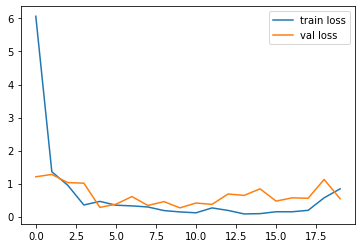

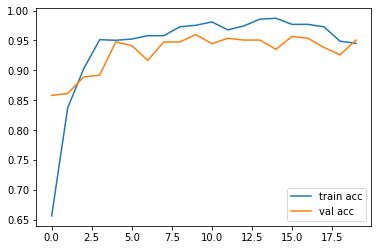

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# saving the model resnet152V2 after training
model_renet152v2.save('model_resnet152V2.h5')

## Transfer learning - Inception network

In [ ]:
# loading the pretrained inception network with top equal to false
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights 
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# Adding the custom top layer on inception network
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)
model_inception = Model(inputs=inception.input, outputs=prediction)# create a model object

In [ ]:
#model_summary
model_inception.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
#compiling inception network
model_inception.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# fiting the model
# Run the cell. It will take some time to execute
r = model_inception.fit_generator(
  training_set,
  validation_data=val_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 540s 8s/step - loss: 28.6384 - accuracy: 0.3539 - val_loss: 2.6987 - val_accuracy: 0.7469
Epoch 2/20
61/61 [==============================] - 35s 578ms/step - loss: 4.8486 - accuracy: 0.6647 - val_loss: 1.6822 - val_accuracy: 0.8148
Epoch 3/20
61/61 [==============================] - 35s 578ms/step - loss: 0.8569 - accuracy: 0.9142 - val_loss: 0.9713 - val_accuracy: 0.8673
Epoch 4/20
61/61 [==============================] - 35s 573ms/step - loss: 1.8329 - accuracy: 0.8170 - val_loss: 0.8226 - val_accuracy: 0.8796
Epoch 5/20
61/61 [==============================] - 35s 576ms/step - loss: 1.1719 - accuracy: 0.8725 - val_loss: 1.0976 - val_accuracy: 0.8796
Epoch 6/20
61/61 [==============================] - 35s 573ms/step - loss: 1.4362 - accuracy: 0.8475 - val_loss: 0.3440 - val_accuracy: 0.9321
Epoch 7/20
61/61 [==============================] - 35s 574ms/step - loss: 0.6605 - accuracy: 0.9178 - val_loss: 1.1319 - val_accuracy: 0.8765


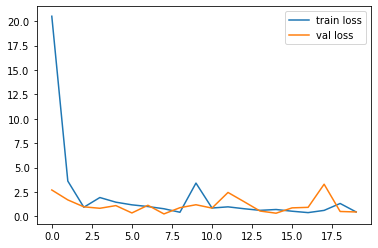

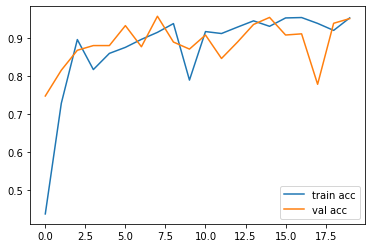

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# saving inception model after training
model_inception.save('model_inception.h5')

##  Prediction of a future image

In [ ]:
# calss label
def class_label(val):
  if val==0:
    return "Diseased cotton leaf"
  elif val==1:
    return "Diseased cotton plant"
  elif val==2:
    return "Fresh cotton leaf"
  else:
    return "Fresh cotton plant"

In [ ]:
# prediction any image
def load(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (224, 224, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

image = load('/content/drive/MyDrive/data/test/fresh cotton leaf/d (384).jpg')
print(model_inception.predict(image))
print("\n")
print('class label =',class_label(np.argmax(model_inception.predict(image), axis=1)[0]))

[[3.1561069e-12 7.6361680e-19 1.0000000e+00 6.2691368e-25]]


class label = Fresh cotton leaf


In [ ]:
from prettytable import PrettyTable
from prettytable import ALL as ALL
table=PrettyTable(hrules=ALL)
table.field_names = [ "Sl.N0", "Model", "Number of epochs",'Total parameters', " val_accuracy"] # # http://zetcode.com/python/prettytable/
table.add_row([1, "Resnet50", 20,23989124, 0.611])
table.add_row([2, "Resnet152v2",20,58733060, 0.959])
table.add_row([3, "Inception Network",20,22007588, 0.950])
print(table)

+-------+-------------------+------------------+------------------+---------------+
| Sl.N0 |       Model       | Number of epochs | Total parameters |  val_accuracy |
+-------+-------------------+------------------+------------------+---------------+
|   1   |      Resnet50     |        20        |     23989124     |     0.611     |
+-------+-------------------+------------------+------------------+---------------+
|   2   |    Resnet152v2    |        20        |     58733060     |     0.959     |
+-------+-------------------+------------------+------------------+---------------+
|   3   | Inception Network |        20        |     22007588     |      0.95     |
+-------+-------------------+------------------+------------------+---------------+


## Conclusion

we got above 95% accuracy using transfer learning models.Resnet152v2 produces the highest accuracy but for deployment purposes, we use the inception network because of fewer parameters in the network as compared to resnet. so we get a result in low latency.